# Custom CNN implementation:

## Check class imbalance

Class Counts in Training Set: {'c0': 2489, 'c1': 2267, 'c2': 2317, 'c3': 2346, 'c4': 2326, 'c5': 2312, 'c6': 2325, 'c7': 2002, 'c8': 1911, 'c9': 2129}


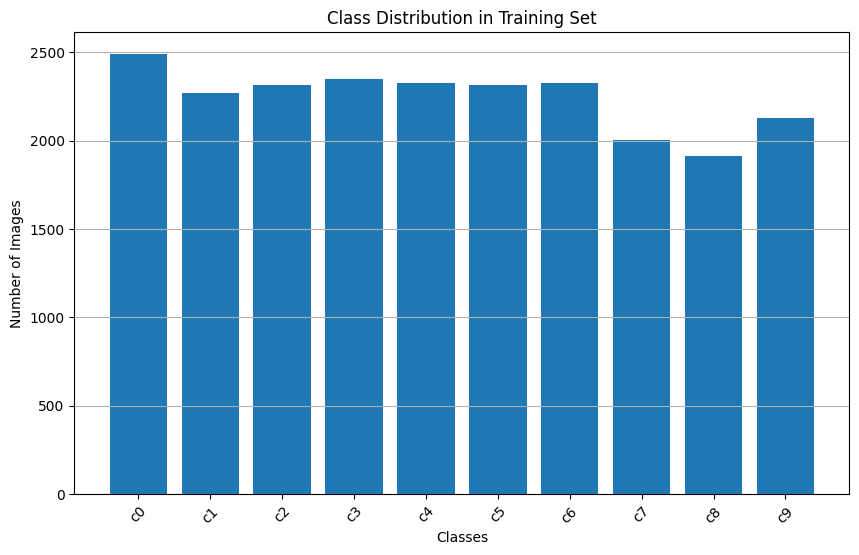

Class Counts in Validation Set: {'c0': 2489, 'c1': 2267, 'c2': 2317, 'c3': 2346, 'c4': 2326, 'c5': 2312, 'c6': 2325, 'c7': 2002, 'c8': 1911, 'c9': 2129}


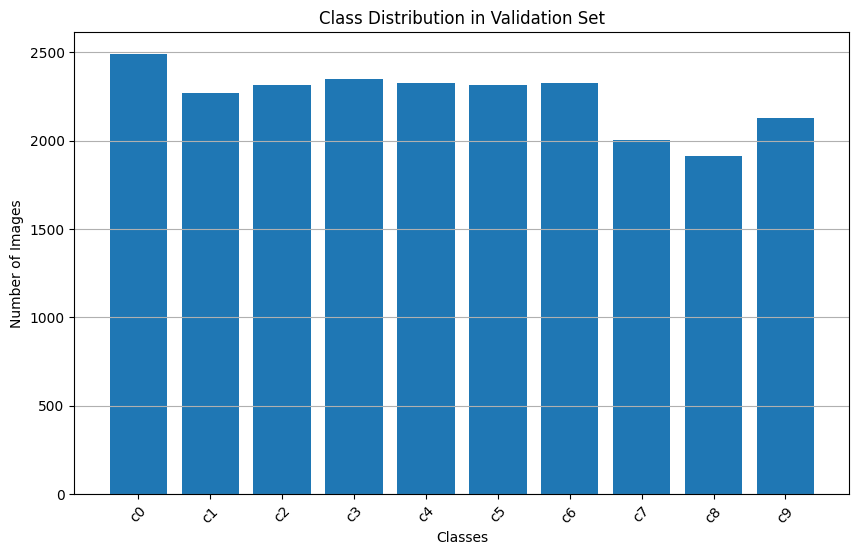

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Dataset Paths- Update with your paths
train_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\train'
test_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\test'
#train_dir = '/Users/samuel/CS5640/FinalProjectPt2/state-farm-distracted-driver-detection/imgs/train'
#test_dir = '/Users/samuel/CS5640/FinalProjectPt2/state-farm-distracted-driver-detection/imgs/test'

# Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64  # Adjust based on GPU memory
EPOCHS = 30
LEARNING_RATE = 1e-4
NUM_CLASSES = 10

# Data Augmentation and Preprocessing
transform_train = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(IMG_HEIGHT, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

transform_val = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Data
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=train_dir, transform=transform_val)

# Analyze Class Distribution in Training Set
train_labels = [train_dataset.targets[i] for i in range(len(train_dataset))]
class_counts_train = Counter(train_labels)

# Map indices to class names
class_names = train_dataset.classes
class_counts_named_train = {class_names[key]: value for key, value in class_counts_train.items()}

print("Class Counts in Training Set:", class_counts_named_train)

# Plot Class Distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts_named_train.keys(), class_counts_named_train.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Repeat for Validation Set
val_labels = [val_dataset.targets[i] for i in range(len(val_dataset))]
class_counts_val = Counter(val_labels)

class_counts_named_val = {class_names[key]: value for key, value in class_counts_val.items()}

print("Class Counts in Validation Set:", class_counts_named_val)

# Plot Class Distribution for Validation Set
plt.figure(figsize=(10, 6))
plt.bar(class_counts_named_val.keys(), class_counts_named_val.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Validation Set")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()



## Create Custom CNN and train

Using device: cuda
Epoch 1/100, Train Loss: 1.8721, Val Loss: 10.7957, Val Accuracy: 0.3104
Best model saved at epoch 1 with validation loss: 10.7957
Epoch 2/100, Train Loss: 1.2022, Val Loss: 10.2554, Val Accuracy: 0.3630
Best model saved at epoch 2 with validation loss: 10.2554
Epoch 3/100, Train Loss: 0.9483, Val Loss: 7.3509, Val Accuracy: 0.4326
Best model saved at epoch 3 with validation loss: 7.3509
Epoch 4/100, Train Loss: 0.7966, Val Loss: 6.7992, Val Accuracy: 0.4627
Best model saved at epoch 4 with validation loss: 6.7992
Epoch 5/100, Train Loss: 0.7047, Val Loss: 5.0229, Val Accuracy: 0.5452
Best model saved at epoch 5 with validation loss: 5.0229
Epoch 6/100, Train Loss: 0.6248, Val Loss: 4.7006, Val Accuracy: 0.5527
Best model saved at epoch 6 with validation loss: 4.7006
Epoch 7/100, Train Loss: 0.5557, Val Loss: 4.0097, Val Accuracy: 0.5958
Best model saved at epoch 7 with validation loss: 4.0097
Epoch 8/100, Train Loss: 0.5131, Val Loss: 3.8846, Val Accuracy: 0.6018
Be

C:\Users\blake\AppData\Local\Temp\ipykernel_22760\3391284904.py:187: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


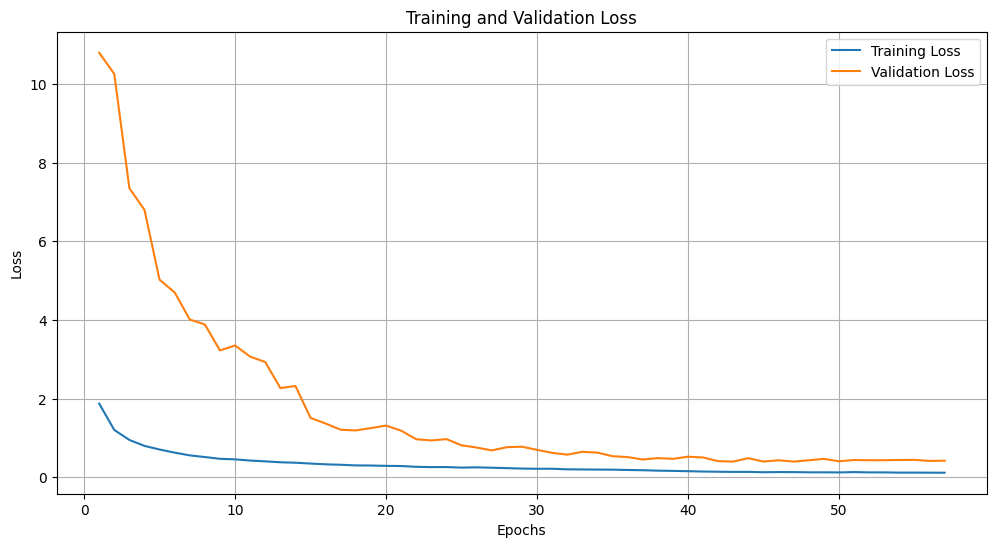

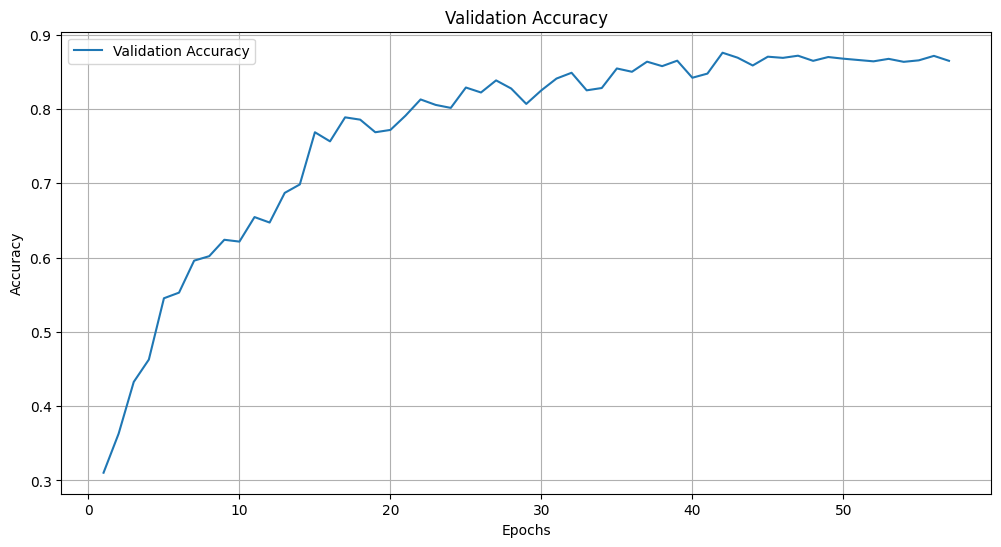


Confusion Matrix:
 [[475   0   0   0   3   0   0   0   1   0]
 [ 40 417   2   1   1   0   3   0   5   0]
 [ 15   1 417   0   6   0   9   0  14   0]
 [ 33   0   0 428  10   0   0   0   2   0]
 [ 13   1   0   0 459   0   1   0   3   0]
 [ 20   0   0   0   3 420   1   1   3   0]
 [  8   0   1   0   4   0 462   0   9   0]
 [ 33   0   5   1   6   0   6 301  40   0]
 [  7   2   1   0   2   0   4   0 355   1]
 [209   2   1   5  23   5   0   0  40 144]]

Classification Report:
               precision    recall  f1-score   support

          c0       0.56      0.99      0.71       479
          c1       0.99      0.89      0.93       469
          c2       0.98      0.90      0.94       462
          c3       0.98      0.90      0.94       473
          c4       0.89      0.96      0.92       477
          c5       0.99      0.94      0.96       448
          c6       0.95      0.95      0.95       484
          c7       1.00      0.77      0.87       392
          c8       0.75      0.95    

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler, random_split
from torchvision import datasets, transforms
from torch.cuda.amp import autocast, GradScaler
from PIL import Image
import os
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import random
import numpy as np

# Set Random Seed for Reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Dataset Paths- Update with your paths
train_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\train'

# Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 1e-5
NUM_CLASSES = 10
PATIENCE = 10  # Early stopping patience

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Augmentation
transform_train = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(10),  # Small rotation to preserve directionality
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Adjust brightness/contrast
    transforms.RandomResizedCrop(IMG_HEIGHT, scale=(0.8, 1.2)),  # Random cropping and resizing
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

transform_val_test = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Training Data
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)

# Split Training Dataset into Training and Validation Sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, validation_set = random_split(train_dataset, [train_size, val_size])

# Weighted Sampling for Training
train_labels = [train_dataset.targets[i] for i in train_subset.indices]
class_counts = Counter(train_labels)
sample_weights = [1.0 / class_counts[label] for label in train_labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=4, pin_memory=True)
val_loader = DataLoader(validation_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# Custom CNN Model
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_HEIGHT // 8) * (IMG_WIDTH // 8), 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialize Model
model = CustomCNN(NUM_CLASSES).to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Mixed Precision Training
scaler = torch.amp.GradScaler()

# Early Stopping Variables
best_val_loss = float('inf')
counter = 0
best_model_path = "custom_cnn_best_model.pth"

# Training Loop with Early Stopping
train_losses, val_losses, val_accuracies = [], [], []
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda"):  # Proper autocast usage
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation Phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            with torch.amp.autocast(device_type="cuda"):  # Proper autocast usage
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved at epoch {epoch+1} with validation loss: {val_loss:.4f}")
    else:
        counter += 1
        if counter >= PATIENCE:
            print(f"Early stopping at epoch {epoch+1}. Best validation loss: {best_val_loss:.4f}")
            break

    scheduler.step(val_loss)

# Load the Best Model
model.load_state_dict(torch.load(best_model_path))
print("Best model loaded for final evaluation.")

# Final Plots and Metrics
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))



## Visualize some predictions

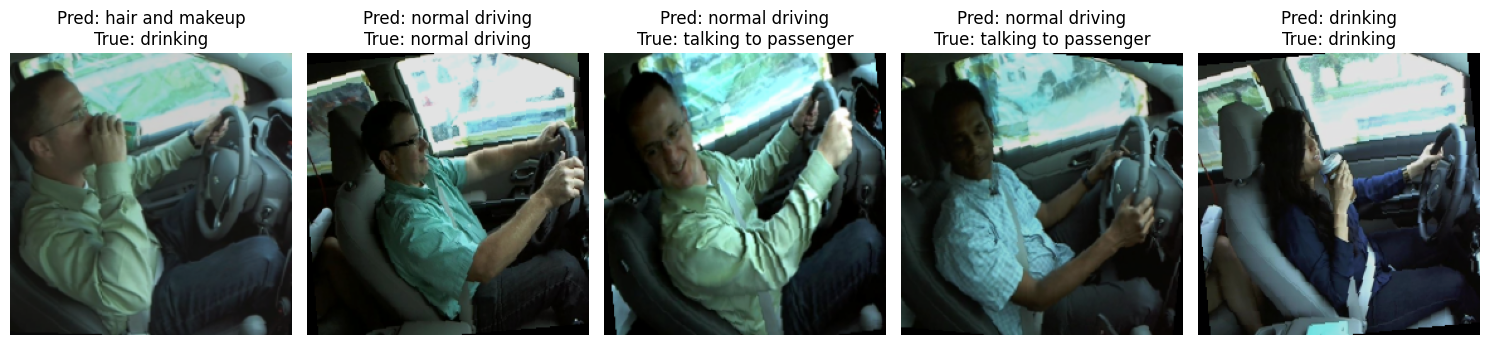

In [8]:
import random
import matplotlib.pyplot as plt
import torch

# Class names with full descriptions
class_names = [
    "normal driving",
    "texting - right",
    "talking on the phone - right",
    "texting - left",
    "talking on the phone - left",
    "operating the radio",
    "drinking",
    "reaching behind",
    "hair and makeup",
    "talking to passenger",
]


# Function to visualize predictions
def visualize_predictions(model, data_loader, device, class_names, num_images=5):
    model.eval()  # Set model to evaluation mode
    images_shown = 0

    # Create a figure
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    axs = axs.flatten()

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for idx in range(images.size(0)):
                if images_shown >= num_images:
                    break
                
                # Move image to CPU for plotting
                img = images[idx].cpu().numpy().transpose((1, 2, 0))
                img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Denormalize
                img = img.clip(0, 1)

                # Plot image and predictions
                axs[images_shown].imshow(img)
                axs[images_shown].axis('off')
                axs[images_shown].set_title(f"Pred: {class_names[preds[idx]]}\nTrue: {class_names[labels[idx]]}")
                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Visualize 5 random predictions
visualize_predictions(model, val_loader, device, class_names, num_images=5)


## Create submission file

In [ ]:
import os
import csv
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import logging

# Configure Logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Dataset Paths- Update with your paths
test_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\test'
best_model_path = "custom_cnn_best_model.pth"
submission_file = "custom_cnn_submission.csv"

# Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64
NUM_CLASSES = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.info(f"Using device: {device}")

# Transformations
transform_val_test = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

# Custom CNN Model
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_HEIGHT // 8) * (IMG_WIDTH // 8), 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Function to Process a Batch of Images
def process_batch(image_paths):
    images = []
    img_names = []
    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        img = Image.open(img_path).convert("RGB")
        img = transform_val_test(img)
        images.append(img)
        img_names.append(img_name)

    images = torch.stack(images).to(device)
    return images, img_names

# Load Test Data
logging.info("Reading test images...")
test_image_paths = [os.path.join(test_dir, img) for img in os.listdir(test_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
if len(test_image_paths) == 0:
    raise ValueError("No valid image files found in the test directory!")
logging.info(f"Found {len(test_image_paths)} test images.")

# Load the Best Model
logging.info("Loading the best model...")
best_model = CustomCNN(NUM_CLASSES).to(device)
best_model.load_state_dict(torch.load(best_model_path, map_location=device))
best_model.eval()
logging.info("Model loaded successfully.")

# Generate Predictions
logging.info("Generating predictions...")
fieldnames = ["img"] + [f"c{i}" for i in range(NUM_CLASSES)]

with open(submission_file, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    for i in tqdm(range(0, len(test_image_paths), BATCH_SIZE), desc="Processing Batches", unit="batch"):
        batch_paths = test_image_paths[i:i + BATCH_SIZE]
        images, img_names = process_batch(batch_paths)

        with torch.no_grad():
            outputs = best_model(images)
            probabilities = torch.softmax(outputs, dim=1).cpu().numpy()

        for j, img_name in enumerate(img_names):
            row = {"img": img_name}
            row.update({f"c{k}": probabilities[j][k] for k in range(NUM_CLASSES)})
            writer.writerow(row)

logging.info(f"Submission file '{submission_file}' created successfully.")

2024-12-04 18:27:16,579 - INFO - Using device: cuda
2024-12-04 18:27:16,580 - INFO - Reading test images...
2024-12-04 18:27:17,101 - INFO - Found 79726 test images.
2024-12-04 18:27:17,102 - INFO - Loading the best model...
C:\Users\blake\AppData\Local\Temp\ipykernel_22760\841400234.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_onl